# Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("dataset/phase_3_TRAIN_7d499bff69ca69b6_6372c3e_MLPC2021_generic.csv")

In [3]:
df.head()

,id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,essentia_spectral_centroid_mean,essentia_spectral_centroid_stdev,...,midlevel_features_rhythm_complexity,midlevel_features_rhythm_stability,midlevel_features_dissonance,midlevel_features_tonal_stability,midlevel_features_minorness,score_mode,score_key_strength,mean_A,mean_V,quadrant
0,GG-01-000,0.206445,0.131383,13.998791,58.329521,3.1,0.539736,0.193987,3367.790527,3684.124268,...,-0.303987,-0.053306,-0.325228,0.347745,-0.119278,0.0,0.795727,50.689655,2.724138,1
1,GG-01-001,0.145753,0.057971,3.533264,75.166183,4.2,0.476832,0.123564,1395.528809,401.987610,...,-0.381182,0.120750,-0.479266,0.451572,-0.064252,0.0,0.844387,50.689655,2.724138,1
2,GG-01-002,0.149111,0.059011,3.337368,82.753929,4.3,0.457741,0.132359,1318.759644,289.306152,...,-0.337422,0.103853,-0.388214,0.430684,-0.226197,0.0,0.758119,50.689655,2.724138,1
3,GG-01-003,0.163914,0.057474,3.078172,79.024742,4.1,0.504427,0.121134,1258.258423,262.561310,...,-0.314282,0.118872,-0.335902,0.314371,-0.006619,1.0,0.747180,50.689655,2.724138,1
4,GG-01-004,0.157382,0.054116,2.682208,59.633064,3.9,0.503377,0.121658,1244.375122,260.756195,...,-0.302913,-0.002940,-0.395495,0.368037,-0.162711,0.0,0.710480,50.689655,2.724138,1


# Split dataset into inputs and targets

In [4]:
# drop target value, student annotations and string ID from input features:
X = df.drop(columns=['quadrant','mean_A','mean_V','id'])

# we want to predict the quadrant:
y = df['quadrant'].values

In [5]:
X.head()

,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,essentia_spectral_centroid_mean,essentia_spectral_centroid_stdev,essentia_spectral_complexity_mean,...,librosa_spectral_flatness_stdev,midlevel_features_melody,midlevel_features_articulation,midlevel_features_rhythm_complexity,midlevel_features_rhythm_stability,midlevel_features_dissonance,midlevel_features_tonal_stability,midlevel_features_minorness,score_mode,score_key_strength
0,0.206445,0.131383,13.998791,58.329521,3.1,0.539736,0.193987,3367.790527,3684.124268,2.986095,...,0.248388,0.065397,-0.029380,-0.303987,-0.053306,-0.325228,0.347745,-0.119278,0.0,0.795727
1,0.145753,0.057971,3.533264,75.166183,4.2,0.476832,0.123564,1395.528809,401.987610,4.181923,...,0.000484,0.353040,-0.073957,-0.381182,0.120750,-0.479266,0.451572,-0.064252,0.0,0.844387
2,0.149111,0.059011,3.337368,82.753929,4.3,0.457741,0.132359,1318.759644,289.306152,4.303592,...,0.000314,0.201885,0.016944,-0.337422,0.103853,-0.388214,0.430684,-0.226197,0.0,0.758119
3,0.163914,0.057474,3.078172,79.024742,4.1,0.504427,0.121134,1258.258423,262.561310,5.271147,...,0.000257,0.181998,-0.019165,-0.314282,0.118872,-0.335902,0.314371,-0.006619,1.0,0.747180
4,0.157382,0.054116,2.682208,59.633064,3.9,0.503377,0.121658,1244.375122,260.756195,4.122828,...,0.000241,0.256362,-0.151648,-0.302913,-0.002940,-0.395495,0.368037,-0.162711,0.0,0.710480


In [6]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Super Simple kNN

In [7]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)

# Fit the classifier to the data
knn.fit(X_train,y_train)

knn.score(X_test, y_test)

0.6015325670498084

# Normalize data and select the best features

In [8]:
X_normalized = MinMaxScaler().fit_transform(X)

In [9]:
print(X.shape)

X_best_5 = SelectKBest(chi2, k=5).fit_transform(X_normalized, y)
X_best_10 = SelectKBest(chi2, k=10).fit_transform(X_normalized, y)
X_best_20 = SelectKBest(chi2, k=20).fit_transform(X_normalized, y)

print(X_best_10.shape)

(2607, 89)
(2607, 10)


# Perform kNN with Cross-Validation on different feature subsets

In [14]:
# create new a knn model
knn2 = KNeighborsClassifier()

k_range = np.arange(1, 150, 2)

# create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': k_range}

# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv_normalized = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv_best_5 = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv_best_10 = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv_best_20 = GridSearchCV(knn2, param_grid, cv=5)

# fit model to data
knn_gscv.fit(X, y)
knn_gscv_normalized.fit(X_normalized, y)
knn_gscv_best_10.fit(X_best_10, y)
knn_gscv_best_5.fit(X_best_5, y)
knn_gscv_best_20.fit(X_best_20, y)

# get test score (mean of 5-fold CV)
scores_all_features = knn_gscv.cv_results_["mean_test_score"]
scores_all_features_normalized = knn_gscv_normalized.cv_results_["mean_test_score"]
scores_10_best_features = knn_gscv_best_10.cv_results_["mean_test_score"]
scores_5_best_features = knn_gscv_best_5.cv_results_["mean_test_score"]
scores_20_best_features = knn_gscv_best_20.cv_results_["mean_test_score"]

# Evaluation

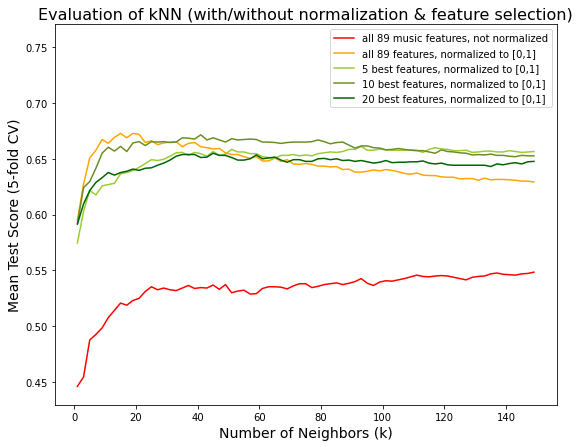

In [23]:
plt.figure(figsize=(9,7))
plt.ylim(0.43,0.77)
plt.plot(k_range, scores_all_features, label="all 89 music features, not normalized", color="red")
plt.plot(k_range, scores_all_features_normalized, label="all 89 features, normalized to [0,1]", color="orange")
plt.plot(k_range, scores_5_best_features, label="5 best features, normalized to [0,1]", color="yellowgreen")
plt.plot(k_range, scores_10_best_features, label="10 best features, normalized to [0,1]", color="olivedrab")
plt.plot(k_range, scores_20_best_features, label="20 best features, normalized to [0,1]", color="darkgreen")

plt.title("Evaluation of kNN (with/without normalization & feature selection)", fontsize=16)
plt.ylabel("Mean Test Score (5-fold CV)", fontsize=14)
plt.xlabel("Number of Neighbors (k)", fontsize=14)
plt.legend()
plt.show()

In [17]:
print("### all 89 features, no normalization ###")
print("best k: ", knn_gscv.best_params_, " best score: ",knn_gscv.best_score_, "\n")

print("### all 89 features, normalized to [0, 1] ###")
print("best k:", knn_gscv_normalized.best_params_, " best score: ",knn_gscv_normalized.best_score_,  "\n")

print("### best 5 features, normalized to [0, 1] ###")
print("best k:", knn_gscv_best_5.best_params_, " best score: ",knn_gscv_best_5.best_score_, "\n")

print("### best 10 features, normalized to [0, 1] ###")
print("best k:", knn_gscv_best_10.best_params_, " best score: ",knn_gscv_best_10.best_score_, "\n")

print("### best 20 features, normalized to [0, 1] ###")
print("best k:", knn_gscv_best_20.best_params_, " best score: ",knn_gscv_best_20.best_score_, "\n")

### all 89 features, no normalization ###
best k:  {'n_neighbors': 149}  best score:  0.5485361925563129 

### all 89 features, normalized to [0, 1] ###
best k: {'n_neighbors': 19}  best score:  0.6724461505651524 

### best 5 features, normalized to [0, 1] ###
best k: {'n_neighbors': 93}  best score:  0.6609048322927468 

### best 10 features, normalized to [0, 1] ###
best k: {'n_neighbors': 41}  best score:  0.6712592200380936 

### best 20 features, normalized to [0, 1] ###
best k: {'n_neighbors': 45}  best score:  0.6547848596495098 

